In [ ]:
# import pandas as pd

# # Step 1: List all file paths manually
# csv_files = [
#     r"C:\Users\shanm\Downloads\BAC.csv",
#     r"C:\Users\shanm\Downloads\C.csv",
#     r"C:\Users\shanm\Downloads\GS.csv",
#     r"C:\Users\shanm\Downloads\JPM.csv",
#     r"C:\Users\shanm\Downloads\MS.csv",
#     r"C:\Users\shanm\Downloads\WFC.csv"
#     # Add more file paths as needed
# ]

# # Step 2: Read each CSV file into a list of DataFrames
# # df_list = [pd.read_csv(file) for file in csv_files]


# # Assuming csv_files contains paths to multiple CSV files
# df_list = []  # Create an empty list to store DataFrames

# for file in csv_files:
#     df = pd.read_csv(file)  # Read each CSV file into a DataFrame
#     df_list.append(df)  # Add the DataFrame to the list

# # Step 3: Concatenate all DataFrames into one
# combined_df = pd.concat(df_list, ignore_index=True)

# # Step 4: Save the combined DataFrame to a new CSV file
# combined_df.to_csv(r'C:\Users\shanm\Downloads\combined_files.csv', index=False)

# print("CSV files have been successfully combined and saved.")





import pandas as pd

# Step 1: List all file paths manually
csv_files = [
    r"C:\Users\shanm\Downloads\BAC.csv",
    r"C:\Users\shanm\Downloads\C.csv",
    r"C:\Users\shanm\Downloads\GS.csv",
    r"C:\Users\shanm\Downloads\JPM.csv",
    r"C:\Users\shanm\Downloads\MS.csv",
    r"C:\Users\shanm\Downloads\WFC.csv"
    # Add more file paths as needed
]

# Bank names for each file
bank_names = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

# Step 2: Read each CSV file into a list of DataFrames and add the bank name column
df_list = []  # Create an empty list to store DataFrames

for i, file in enumerate(csv_files):
    df = pd.read_csv(file)  # Read each CSV file into a DataFrame
    df['Bank Name'] = bank_names[i]  # Add the Bank Name column
    df_list.append(df)  # Add the DataFrame to the list

# Step 3: Concatenate all DataFrames into one
combined_df = pd.concat(df_list, ignore_index=True)

# Step 4: Save the combined DataFrame to a new CSV file
combined_df.to_csv(r'C:\Users\shanm\Downloads\combined_files.csv', index=False)

print("CSV files have been successfully combined and saved.")




CSV files have been successfully combined and saved.


In [18]:
data=pd.read_csv(r"C:\Users\shanm\Downloads\combined_files.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Bank Name
0,2006-01-03,46.919998,47.180000,46.150002,47.080002,34.811729,16296700,BAC
1,2006-01-04,47.000000,47.240002,46.450001,46.580002,34.442013,17757900,BAC
2,2006-01-05,46.580002,46.830002,46.320000,46.639999,34.486385,14970700,BAC
3,2006-01-06,46.799999,46.910000,46.349998,46.570000,34.434616,12599800,BAC
4,2006-01-09,46.720001,46.970001,46.360001,46.599998,34.456806,15619400,BAC


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21138 entries, 0 to 21137
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       21138 non-null  object 
 1   Open       21138 non-null  float64
 2   High       21138 non-null  float64
 3   Low        21138 non-null  float64
 4   Close      21138 non-null  float64
 5   Adj Close  21138 non-null  float64
 6   Volume     21138 non-null  int64  
 7   Bank Name  21138 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.3+ MB


In [20]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21138 entries, 0 to 21137
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       21138 non-null  datetime64[ns]
 1   Open       21138 non-null  float64       
 2   High       21138 non-null  float64       
 3   Low        21138 non-null  float64       
 4   Close      21138 non-null  float64       
 5   Adj Close  21138 non-null  float64       
 6   Volume     21138 non-null  int64         
 7   Bank Name  21138 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.3+ MB


In [24]:
bar=data.groupby('Bank Name')['Volume'].sum().reset_index()
bar

,Bank Name,Volume
0,BAC,413881987700
1,C,89268155300
2,GS,23156943100
3,JPM,92130471800
4,MS,55456720100
5,WFC,103857612700


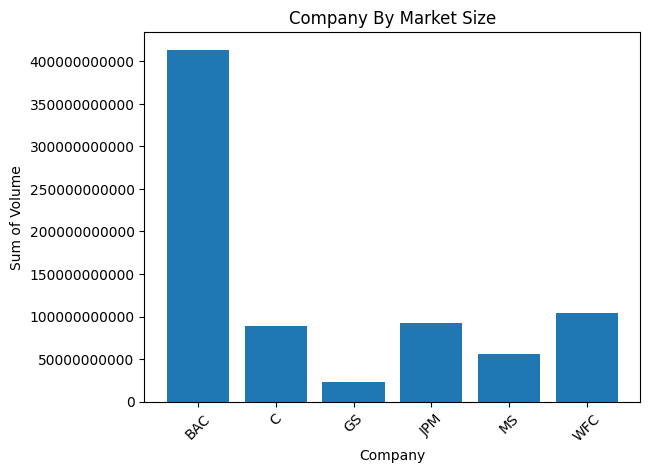

In [26]:
import matplotlib.pyplot as plt
plt.bar(bar['Bank Name'],bar['Volume'])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Company')
plt.ylabel('Sum of Volume')
plt.title('Company By Market Size')
plt.show()

In [32]:
data['year']=data['Date'].dt.year
line=data.groupby('year')['Open'].sum().reset_index()
line


,year,Open
0,2006,211698.179774
1,2007,224545.479806
2,2008,121304.409968
3,2009,69538.359910
4,2010,77064.869909
5,2011,67489.870039
6,2012,59946.980034
7,2013,84639.970035
8,2014,96039.020219
9,2015,105199.999994


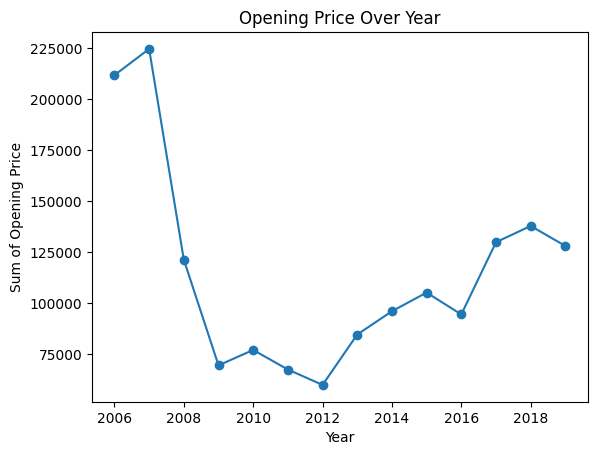

In [43]:
plt.plot(line['year'],line['Open'],marker='o')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Year')
plt.ylabel('Sum of Opening Price')
plt.title('Opening Price Over Year')
plt.show()

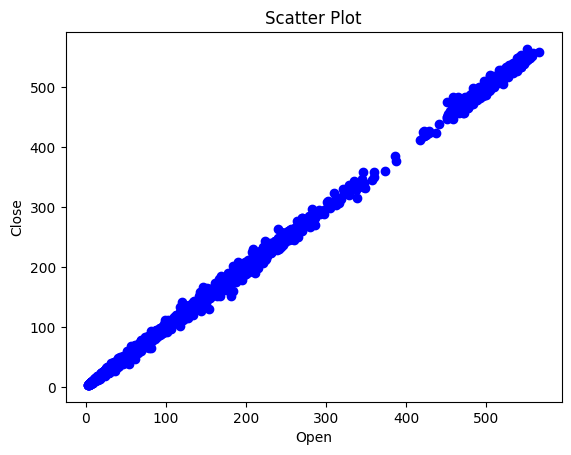

In [44]:
plt.scatter(data['Open'],data['Close'], color='blue', label='Variable 1')
plt.title('Scatter Plot')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

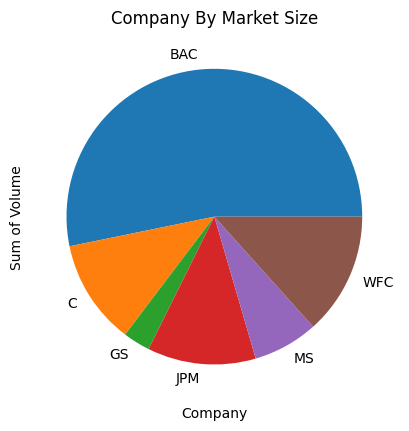

In [49]:
plt.pie(bar['Volume'],labels=bar['Bank Name'])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Company')
plt.ylabel('Sum of Volume')
plt.title('Company By Market Size')
plt.show()

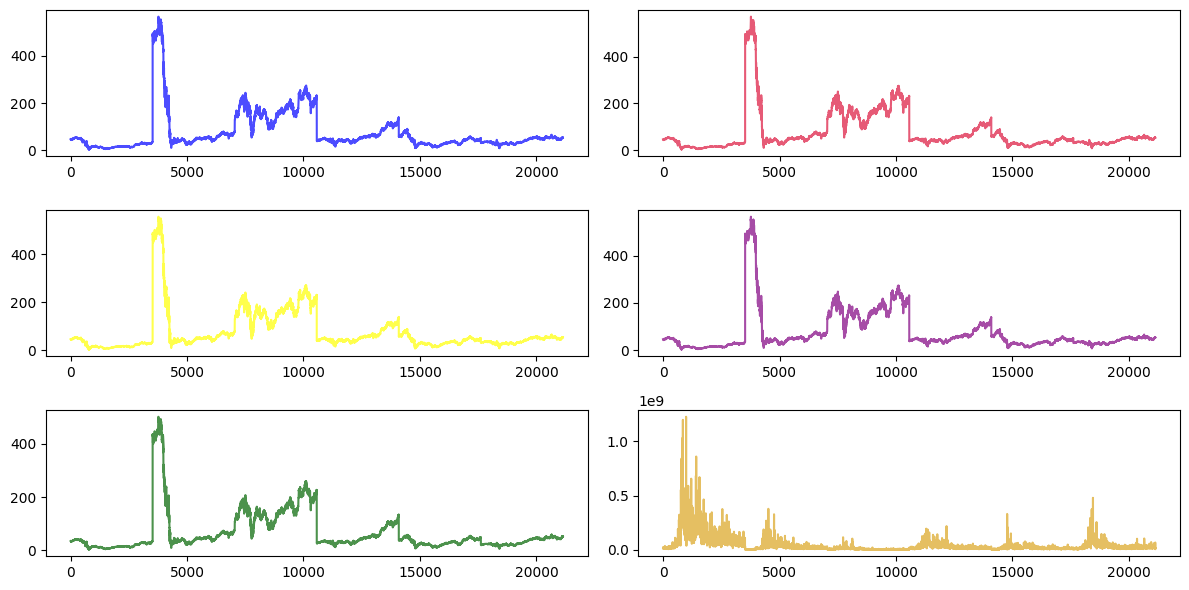

In [60]:
fig, axes = plt.subplots(3, 2, figsize=(12, 6))  # 1 row, 2 columns


axes[0,0].plot(data['Open'], color='blue', alpha=0.7)


# Second subplot: Line plot for 'Close'
axes[0,1].plot(data['High'], color='crimson', alpha=0.7)
axes[1,0].plot(data['Low'], color='yellow', alpha=0.7)
axes[1,1].plot(data['Close'],color='purple', alpha=0.7)
axes[2,0].plot(data['Adj Close'],color='Darkgreen', alpha=0.7)
axes[2,1].plot(data['Volume'],color='goldenrod', alpha=0.7)


# Adjust layout for better visualization
plt.tight_layout()
plt.show()

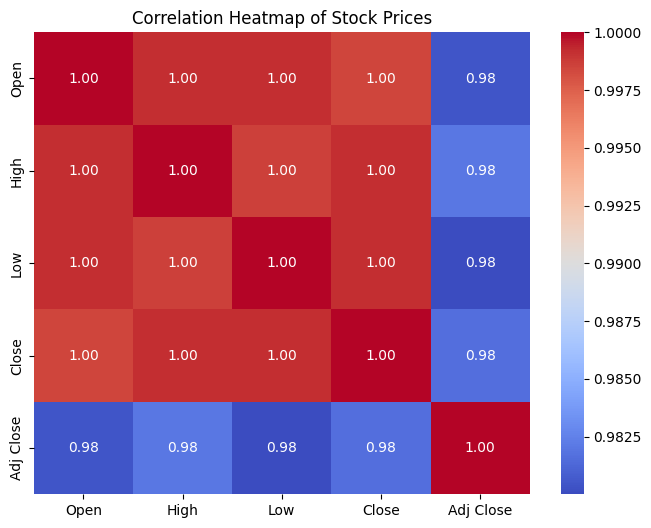

In [61]:
import seaborn as sns

# Calculate the correlation matrix
correlation = df[['Open', 'High', 'Low', 'Close', 'Adj Close']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Stock Prices')
plt.show()